# **Práctica de Whisper**

### **1. Ejecute el tutorial completo.**

# Web App Demonstrating OpenAI's Whisper Speech Recognition Model

This is a Colab notebook that allows you to record or upload audio files to [OpenAI's free Whisper speech recognition model](https://openai.com/blog/whisper/). This was based on [an original notebook by @amrrs](https://github.com/amrrs/openai-whisper-webapp), with added documentation and test files by [Pete Warden](https://twitter.com/petewarden).

To use it, choose `Runtime->Run All` from the Colab menu. If you're viewing this notebook on GitHub, follow [this link](https://colab.research.google.com/github/petewarden/openai-whisper-webapp/blob/main/OpenAI_Whisper_ASR_Demo.ipynb) to open it in Colab first. After about a minute or so, you should see a button at the bottom of the page with a `Record from microphone` link. Click this, you'll be asked to give permission to access your mic, and then speak for up to 30 seconds. Once you're done, press `Stop recording`, and a transcript of the first 30 seconds of your speech should soon appear in the box to the right of the recording button. To transcribe more speech, click `Clear' in the left box and start over.

You can also upload your own audio samples using the folder icon on the left of this page. That gives you access to a file system you can upload to by dragging files into it. You can see examples of how to run the transcription in a couple of the cells below.

## Install the Whisper Code

In [1]:
! pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00


## Load the ML Model

In [2]:
import whisper

model = whisper.load_model("base")


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 49.4MiB/s]


## Check we have a GPU

You should see the output `device(type='cuda', index=0)` below. If you don't, you may be on a CPU-only Colab instance which will run more slowly. Go to `Runtime->Change Runtime Type` to fix this.

In [3]:
model.device

device(type='cuda', index=0)

## Download Test Audio Files

This repository has a couple of pre-recorded MP3s to run through the transcribe function. You can listen to them with the audio widgets displayed below.

In [4]:
!git clone https://github.com/petewarden/openai-whisper-webapp

Cloning into 'openai-whisper-webapp'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 33 (delta 11), reused 30 (delta 9), pack-reused 1
Receiving objects: 100% (33/33), 1.40 MiB | 24.22 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [5]:
from IPython.display import Audio
Audio("/content/openai-whisper-webapp/mary.mp3")

In [6]:
from IPython.display import Audio
Audio("/content/openai-whisper-webapp/daisy_HAL_9000.mp3")

## Define the Transcribe Function

Now we've loaded the model, and have the code, this is the function that takes an audio file path as an input and returns the recognized text (and logs what it thinks the language is).

In [7]:
def transcribe(audio):

    # load audio and pad/trim it to fit 30 seconds
    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # detect the spoken language
    _, probs = model.detect_language(mel)
    print(f"Detected language: {max(probs, key=probs.get)}")

    # decode the audio
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    return result.text


## Test with Pre-Recorded Audio

Before we bring up the UI to allow you to record your own live audio, we're going to run the `transcribe()` function on a couple of MP3s we've downloaded. You should see `Mary had a little lamb, its fleece was white as snow, and everywhere that Mary went, the lamb was sure to go.` for `mary.mp3`, which I recorded as an example of clear audio. The second file is a lot harder to transcribe, with very distorted audio, but the model does a good job with `Tazy, Tazy, Tazy. Give me your answer to time after crazy all for the love of you. It won't be a stylish marriage`. You'll notice the transcript is cut off after 30 seconds, which is the default length for this notebook. It can be extended, but that's outside of the scope of this documentation.

In [8]:
easy_text = transcribe("/content/openai-whisper-webapp/mary.mp3")
print(easy_text)

hard_text = transcribe("/content/openai-whisper-webapp/daisy_HAL_9000.mp3")
print(hard_text)

Detected language: en
Mary had a little lamb, its fleece was white as snow, and everywhere that Mary went, the lamb was sure to go.
Detected language: en
Tazy, Tazy, Tazy. Give me your answer to time after crazy all for the love of you. It won't be a stylish marriage


## Install the Web UI Toolkit

We'll be using gradio to provide the widgets we need to do audio recording.

In [9]:
! pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.7 MB/s

In [10]:
import gradio as gr
import time

## Web Interface

After running this script, you should see two widgets below that you can use to record live audio and see the transcription, as described in the introduction.

### **2. Con los audios grabados en la práctica de DTW ejecute el reconocimiento sobre los audios. La idea es aprovechar el código ya preparado.**

In [ ]:

gr.Interface(
    title = 'OpenAI Whisper ASR Gradio Web UI',
    fn=transcribe,
    inputs=[
        gr.Audio(type="filepath")
    ],
    outputs=[
        "textbox"
    ],
    live=True).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b8372c5492d16c0adb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Los audios grabados para la práctica de DTW son solamente de una palabra cada vez. Por lo que no me pareció el ejemplo más adecuado para el reconocimiento de habla. Por tanto, he utilizado uno de los audios que grabé para la primera práctica de la asignatura. El resultado ha sido más que satisfactorio ya que ha reconocido correctamente todas las palabras (adjunto una captura de pantalla del resultado).

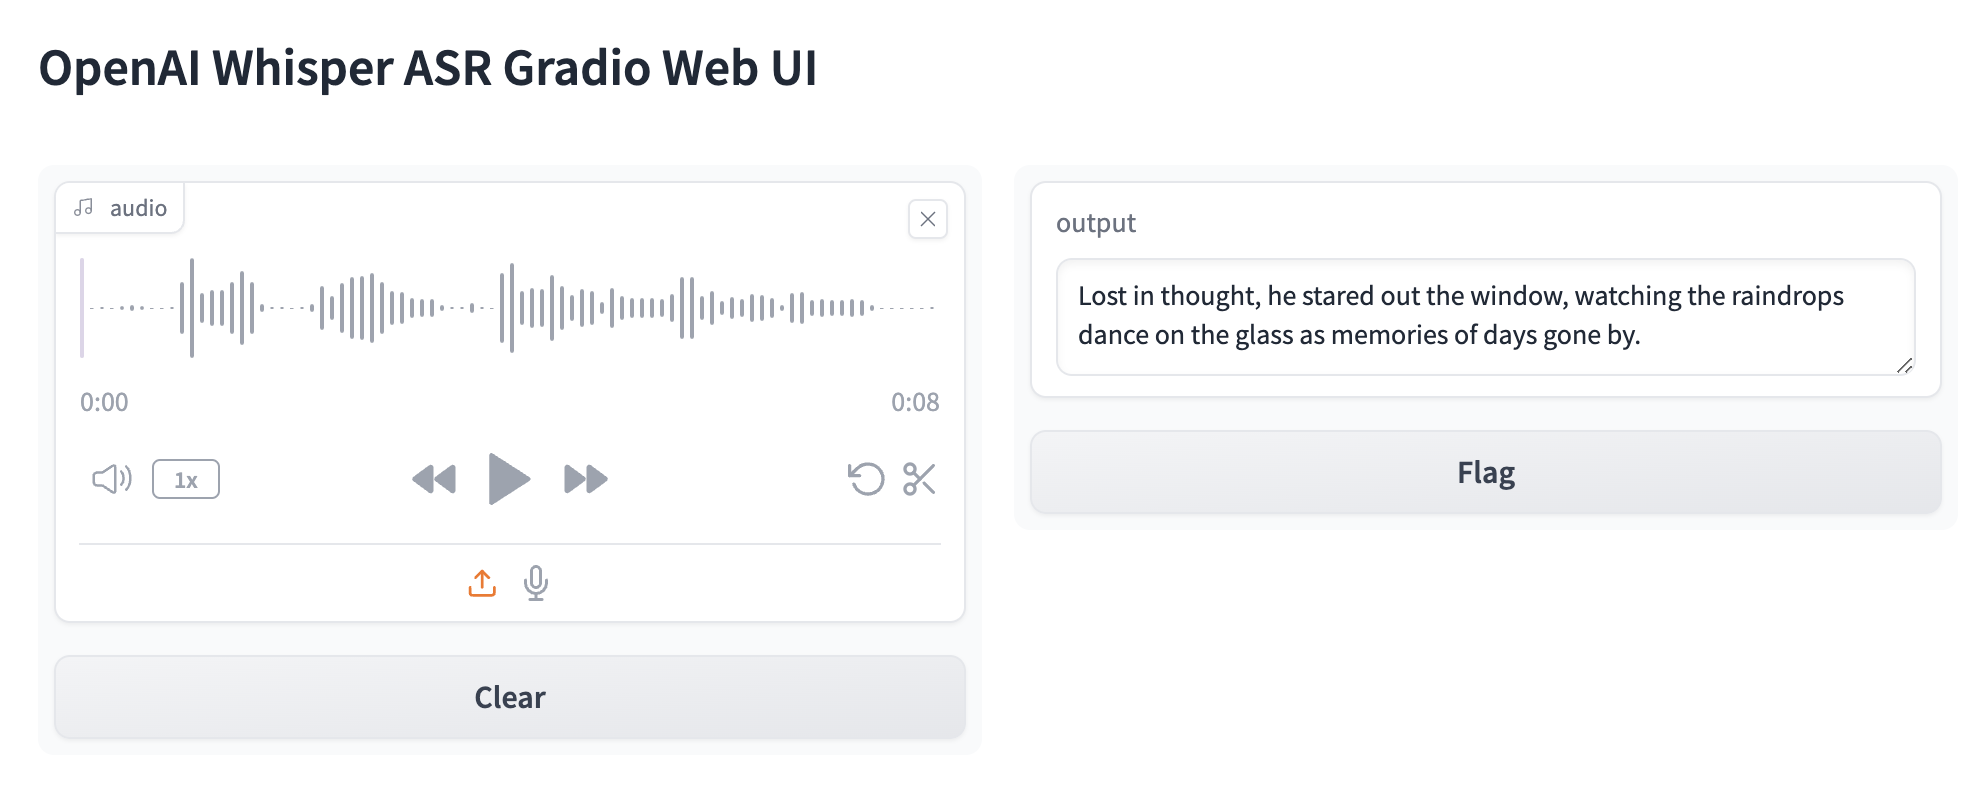

In [ ]:
# otra manera de hacerlo
import whisper
model = whisper.load_model("medium.en", device="cuda")
transcription = model.transcribe("/content/audio2.wav", task="transcribe", language="en")
print(transcription["text"])

100%|█████████████████████████████████████| 1.42G/1.42G [00:15<00:00, 96.6MiB/s]


 Lost in thought, he stared out the window, watching the raindrops dance on the glass as memories of days gone by.


Vemos que haciéndolo de esta manera también reconoce el audio perfectamente.

In [11]:
gr.Interface(
    title='OpenAI Whisper ASR Gradio Web UI',
    fn=transcribe,
    inputs=[
        gr.Audio(type="filepath")
    ],
    outputs=[
        "textbox"
    ],
    live=True
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://228a3ebd6ecc892946.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


En este caso, probando con el audio "bata_pla_1.wav" ha reconocido una palabra en un idioma extranjero.

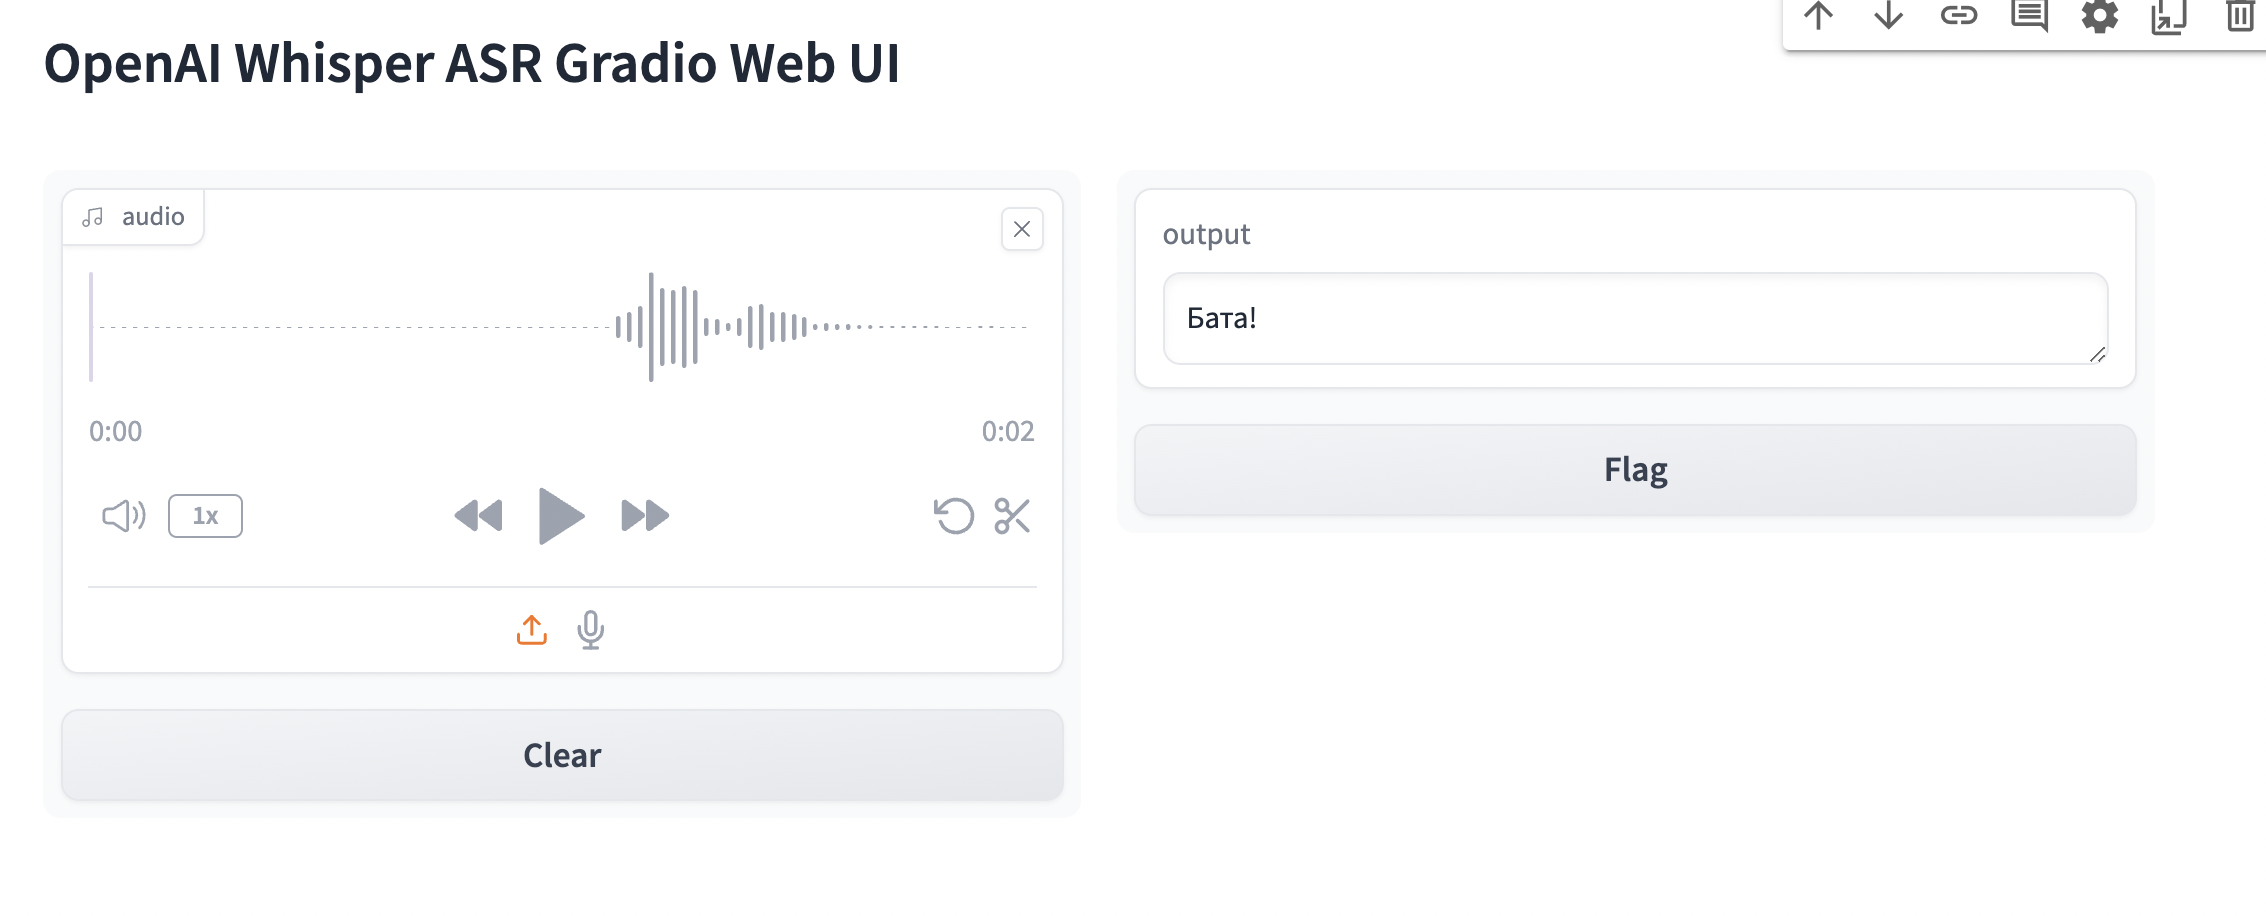

In [ ]:
# probamos de la otra manera
model = whisper.load_model("medium.en", device="cuda")
transcription = model.transcribe("/content/Audios/bata_pla_1.wav", task="transcribe", language="en")
print(transcription["text"])

 Bata


In [13]:
# probamos de la otra manera
model = whisper.load_model("medium.en", device="cuda")
transcription = model.transcribe("/content/Audios/bata_pla_1.wav", task="transcribe", language="es")
print(transcription["text"])

/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:65: UserWarning: /root/.cache/whisper/medium.en.pt exists, but the SHA256 checksum does not match; re-downloading the file
  warnings.warn(
100%|█████████████████████████████████████| 1.42G/1.42G [01:17<00:00, 19.8MiB/s]


 Bata


Probamos de otra forma con dos versiones: una en inglés, que es el idioma por defecto, y otra cambiando el idioma a español ("es"). En ambos casos obtenemos un resultado satisfactorio, con la transcripción esperada: "bata".

A continuación, ejecuto un bucle for sobre la carpeta de audios que he subido al entorno de colab. Esta carpeta está formada por nueve audios distintos, cada uno con de las palabras usadas en la práctica DTW: "cara", "bata", "paca", "para", "pata", "caca", "bata", "vara" y "vaca":

In [ ]:
import os

ruta = "/content/Audios/"
audios = [os.path.join(ruta, archivo) for archivo in os.listdir(ruta) if archivo.endswith(".wav")]

for audio in audios:
    transcripcion = model.transcribe(audio, task = "transcribe", language = "es")
    print(audio[16:])
    print(transcripcion["text"])

cara_pla_1.wav
 Gotta.
bata_pla_1.wav
 Bata
paca_pla_1.wav
 Пока!
pata_pla_1.wav
 Pada
vaca_pla_1.wav
 Vodka
vara_pla_1.wav
 Bada!
para_pla_1.wav
 some
cata_pla_1.wav
 kata
caca_pla_1.wav
 Kaka


Vemos que aquí los resultados no son los mejores. Ha reconocido bien solo tres palabras, de las cuales dos no están con la ortografía correcta ("kata" y "kaka").
Además, a pesar de especificar el idioma, hay palabras en otras lenguas, como "gotta", "some" o "Пока".

### **3.Con el archivo “Obi‐Wan‐says‐Hello” ejecute el reconocimiento con las opciones por defecto. Observe la salida. Puede escuchar que es un texto muy complicado con muchas repeticiones,de ahí la salida obtenida.**

In [ ]:
import whisper
model = whisper.load_model("medium.en", device="cuda")
transcription = model.transcribe("/content/Obi-Wan-says-Hello.m4a", task="transcribe", language="en")
print(transcription["text"])

 Hello there! Hello there! Hello there! Hello there! Hello there! Hello there! Hello there! General Kenobi!


**A continuación, vamos a modificar las opciones por defecto. Las opciones de beam‐size (haz de
búsqueda en la programación dinámica) y best_of (mejores caminos contemplados en la
búsqueda):**

In [ ]:
beam_size=5
best_of=5
temperature=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0)
decode_options = dict(language="en", best_of=best_of, beam_size=beam_size, temperature=temperature)
transcribe_options = dict(task="transcribe", **decode_options)
transcription = model.transcribe("/content/Obi-Wan-says-Hello.m4a", **transcribe_options)
print(transcription["text"])

 Hello there! Hello there! Hello there! Hello there! Hello there! Hello there! Hello there! General Kenobi!


Vemos que la salida es la misma tanto con los parámetros por defecto como con los parámetros modificados. A pesar de ser un audio con mucha distorsión y repeticiones, el sistema ha reconocido correctamente el texto pronunciado. Es imposible saber cuántas veces se repite en el audio "Hello There", por lo que la elección del programa de escribirlo site veces, parece razonable. Además, las dos versiones han entendido también el "General Kenobi" del final, que tampoco era excesivamente fácil de identificar. Por lo que el funcionamiento del programa en este caso es bastante satisfactorio.

### **4. Grabe una frase compleja, por ejemplo: "Cuando cuentas cuentos, cuenta cuántos cuentos cuentas porque si no cuentas cuántos cuentos cuentas nunca sabrás cuántos cuentos cuentas tú."**

In [ ]:
Audio("/content/audio_dificil_1.m4a")

### **5. Pruebe el reconocimiento con las opciones por defecto y con opciones modificadas, compruebe las diferencias.**

Por defecto:

In [ ]:
transcription = model.transcribe("/content/audio_dificil_1.m4a", task="transcribe", language="en")
print(transcription["text"])

 Cuando cuentas cuentos cuenta cuantos cuentos cuentas porque si no cuentas cuantos cuentos cuentas, nunca sabras cuantos cuentos cuentas tú.


Parámetos modificados:

In [ ]:
beam_size=5
best_of=5
temperature=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0)
decode_options = dict(language="es", best_of=best_of, beam_size=beam_size,
temperature=temperature)
transcribe_options = dict(task="transcribe", **decode_options)
transcription = model.transcribe("/content/audio_dificil_1.m4a", **transcribe_options)
print(transcription["text"])

 Cuando cuentas cuentos cuenta cuantos cuentos cuentas porque si no cuentas cuantos cuentos cuentas nunca sabras cuantos cuentos cuentas tú.


In [ ]:
beam_size=5
best_of=None
temperature=0.0
decode_options = dict(language="en", best_of=best_of, beam_size=beam_size,
temperature=temperature)
transcribe_options = dict(task="transcribe", **decode_options)
transcription = model.transcribe("/content/audio_dificil_1.m4a", **transcribe_options)
print(transcription["text"])

 Cuando cuentas cuentos cuenta cuantos cuentos cuentas porque si no cuentas cuantos cuentos cuentas nunca sabras cuantos cuentos cuentas tú.


Vemos que obtenemos el mismo resultado con las tres versiones del código. En todas ha acertado con las palabras y en ninguna ha acertado con los signos de puntuación o las tildes en palabras como "cuántos", las cuales son bastante importantes para una correcta comprensión del mensaje. Sin embargo, en general, han realizado un buen trabajo.

### **6. Modifique las opciones de forma similar sobre un archivo que haya fallado para ver si cambia.**

In [ ]:
beam_size=5
best_of=None
temperature=0.0
decode_options = dict(language="es", best_of=best_of, beam_size=beam_size,
temperature=temperature)
transcribe_options = dict(task="transcribe", **decode_options)
transcription = model.transcribe("/content/Audios/pata_pla_1.wav", **transcribe_options)
print(transcription["text"])

 Paataa


De los seis audios que me han fallado en el paso 2, solo he conseguido que reconozca bien uno de ellos cambiando los parámetros: "pata". No obstante, tampoco lo reconoce bien del todo, ya que, por algún motivo, ha repetido dos veces las vocales.
Al tratarse de audios tan cortos, de una sola palabra, el rendimiento del sistema es bajo.
Sin embargo, a lo largo de la práctica se ha visto que con frases más largas funciona de manera casi perfecta.